
We'll try to use Naive Bayes to create a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated saraly.


# Import Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get the Data

In [42]:
social = pd.read_csv('Social_Network_Ads.csv')

In [43]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [44]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


# Check for null values

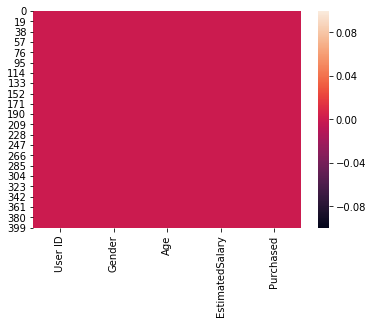

In [45]:
sns.heatmap(social.isnull())

In [46]:
social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Exploratory Data Analysis

In [47]:
social.drop(['User ID', 'Gender'], axis=1, inplace=True)

In [48]:
social.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


create a histogram of age

Text(0.5,0,'Age')

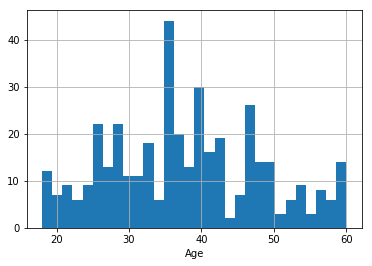

In [49]:
social['Age'].hist(bins=30)
plt.xlabel('Age')

create a jointplot of Age and Estimated Salary

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


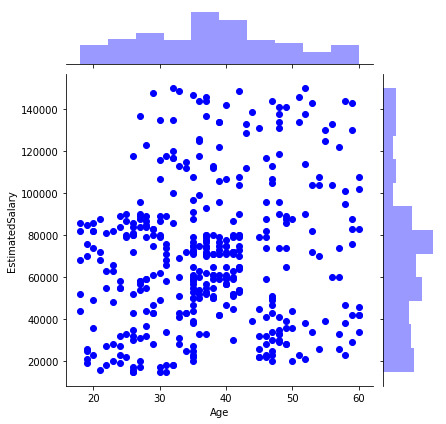

In [50]:
sns.jointplot(x='Age', y='EstimatedSalary', data=social, color='blue')

create a jointplot of EstimatedSalary and Purchased with kde distribution

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


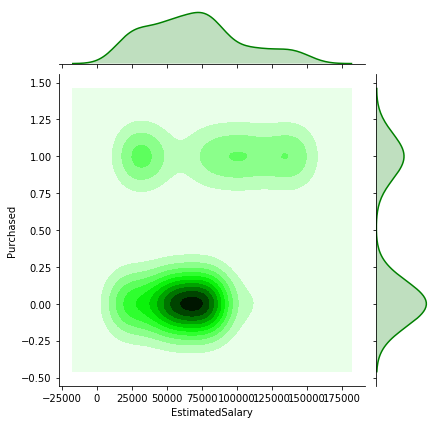

In [51]:
sns.jointplot(x='EstimatedSalary', y='Purchased', kind='kde', color='green', data=social)

fianlly create a pairplot 

C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ADMIN\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


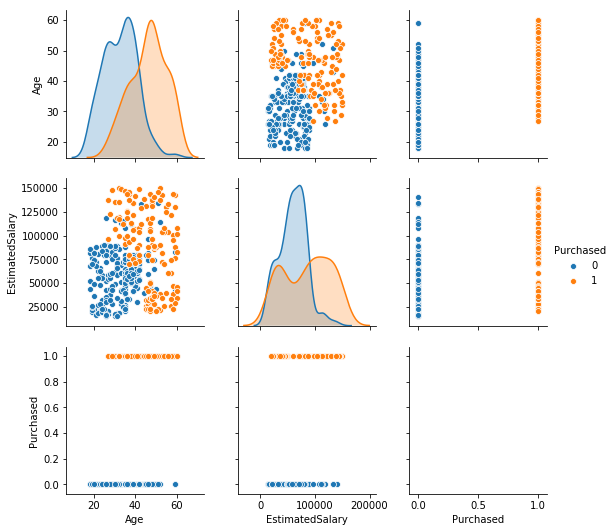

In [52]:
sns.pairplot(data=social, hue='Purchased')

# get the correlation of the data

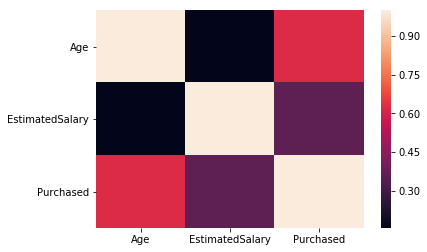

In [53]:
sns.heatmap(social.corr())

# Standardized the variables

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
scaled_array = scaler.fit_transform(social.drop('Purchased', axis=1))

In [57]:
social.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [58]:
X = pd.DataFrame(data=scaled_array, columns=social.columns[:-1])

In [59]:
X.head(2)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681


In [60]:
type(X)

pandas.core.frame.DataFrame

In [61]:
X.shape

(400, 2)

In [62]:
Y = social['Purchased']

In [63]:
type(Y)

pandas.core.series.Series

In [64]:
Y.shape

(400,)

# Train test split the Data

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Using NaiveBayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
model = GaussianNB()

In [69]:
model.fit(x_train, y_train)

GaussianNB(priors=None)

# Prediction

In [70]:
predict = model.predict(x_test)

# Evaluation

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
print(confusion_matrix(y_test, predict))

[[75  6]
 [ 2 37]]


In [73]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.97      0.93      0.95        81
          1       0.86      0.95      0.90        39

avg / total       0.94      0.93      0.93       120



The model can successfully predict whether a person will purchase a product or not